# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Use Floyd's cifar-10 dataset if present
floyd_cifar10_location = '/input/cifar-10/python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 5:
Samples: 10000
Label Counts: {0: 1014, 1: 1014, 2: 952, 3: 1016, 4: 997, 5: 1025, 6: 980, 7: 977, 8: 1003, 9: 1022}
First 20 Labels: [1, 8, 5, 1, 5, 7, 4, 3, 8, 2, 7, 2, 0, 1, 5, 9, 6, 2, 0, 8]

Example of Image 100:
Image - Min Value: 5 Max Value: 255
Image - Shape: (32, 32, 3)
Label - Label Id: 9 Name: truck


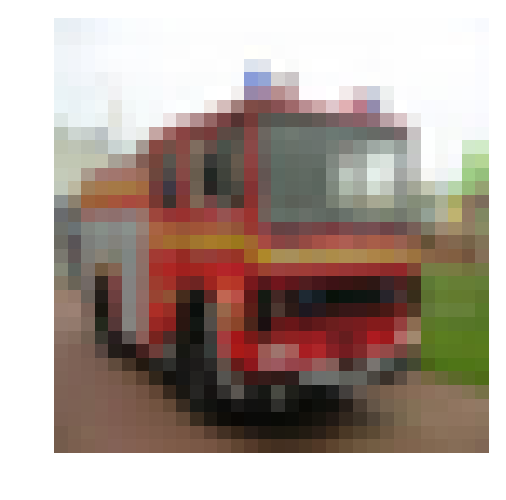

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 5
sample_id = 100
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [3]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    # so I know there are 128 pixels but dividing by that wasnt working so I did 2*128
    return (x)/(256)

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [4]:
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    
    # TODO: Implement Function
    
    #at first I thought I needed sklearn's preprocessing.LabelBinarizer() as it is used in lesson 7.14 but then
    # I realized that I can just generate an array of zeros and feed the values as ones through the length of 
    #each label (used earlier modules in udacity course to find code that would help me with this):
    one_hot_vec = np.zeros((len(x), 10))
    for i in range(len(x)):
        one_hot_vec[i,x[i]] = 1
    return one_hot_vec
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


# Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open
                                           ('preprocess_validation.p',mode='rb'))

# Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [7]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    # Placeholder syntax:  tf.placeholder(dtype, shape=None, name=None) 
    # we cannot just feed image_shape because it has the wrong shape: we need a batch term first...
    #t o set batch as none as it asks we have to concatenate [None] with image_shape and to do that
    # we have to turn image_shape into a list to concatenate b/c you can't do it with a tuple
    # print (image_shape)
    # (error) print ([None]+image_shape)
    # print ([None]+list(image_shape))
    
    return tf.placeholder(tf.float32, 
                          [None]+list(image_shape),
                          "x")


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    # for this, we want the shape to be [open to whatever # of rows, then the classes (10) but Im supposed to use the variable ]
    return tf.placeholder(tf.float32,
                          [None,n_classes],
                          "y")


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32,
                          None,
                          "keep_prob")


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply
convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
* We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
* We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

In [8]:

def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # Because it reccommends using same padding for all following parts of function, I declare this up top
    padding='SAME'

    # I need to implement weights, but I want to see the shapes of the variables I will be using:
    # I tried to use the np.shape() and tf.shape() command, but the .get_shape().as_list() is really helpful here
    # I also know from the course that I want to wrap everything in a tf.Variable, although I am not 100% on why...
 
    # Implementing the bias for this layer, we just create a matrix with 0 for each of the output nodes
    bias_conv=tf.Variable(tf.zeros(conv_num_outputs))
    
    # Implementing the weights for this layer, we use tf's truncated_normal to sample random values from a 
    # truncated normal distribution to apply as the weights for this layer which will then be updated
    # through backpropogation. This has the syntax: tf.truncated_normal(shape, mean=, stddev=, dtype=tf.float32)
    
    # The shape for this tensor of weights should be (conv_ksize, depth of x_tensor, conv_num_outputs) where conv_ksize
    #is a tuple, the depth must be taken by looking at the shape of x_tensor, and conv_num_outputs is a number:
    
    # I need a separate x_shape with the shape of x_tensor as a list to get the depth value out
    print(tf.shape(x_tensor))
    print(np.shape(x_tensor))
    # It did not work when I at first just tried to use tf/np.shape and I wasn't quite sure about why...
    # I think it must have to do with the fact that the np command returns (?...)
    # it returned and that seemed to mess up the tests so I found a .get_shape().as_list() workaround:
    print(x_tensor.get_shape().as_list())
    x_shape=x_tensor.get_shape().as_list()
    print(list(conv_ksize))
    print(conv_num_outputs)
    
    # Now we can finally construct the shape by appending tupples
    # Note that the commas seem to really matter when making the list and for some reason
    # it only works when I have a comma after conv_num_outputs as well as the other terms which is weird to me...?
    # Also, it is important to remember to choose the right part of x_shape as numbering starts at 0 and I want 
    # the fourth term in the list
    w_conv_shape= list(conv_ksize+(x_shape[3],)+(conv_num_outputs,))
    print(w_conv_shape)
    
    # I know we want the weights to be distributed around mean zero but I wasnt sure how to pick the stddev
    # I found this https://www.tensorflow.org/get_started/mnist/pros which set it to 0.1 so I chose that
    weights_conv=tf.Variable(tf.truncated_normal((w_conv_shape),0.0,0.1))
    
    # Next, I must make apply a convolution to x_tensor using weight and conv_strides (same padding recommended)
    # to do this I can use tf.nn.conv2d(input, filter, strides, padding) which on the tensorflow syntax website it 
    # specifies that "for the most common case of the same horizontal and vertical strides, strides=[1,stride,stride,1]"
    # I can do this easily by concetanating because conv_strides is in a list already and I just need to add
    # a one before and after. Commas also matter here again.
    
    print(conv_strides)
    strides=(list((1,)+conv_strides+(1,)))
    # not right: strides=np.array([1,conv_strides,1])
    print(strides)
    
    conv_layer=tf.nn.conv2d(x_tensor,
                            weights_conv,
                            strides,padding)
    
    # Add bias with tf.nn.bias_add(value, bias, *data_format, *name) *=optional
    # this is pretty straitforward :)
    conv_layer_bias=tf.nn.bias_add(conv_layer,
                                   bias_conv)
    
    # Add a nonlinear activation to the convolution-> I am going to use ReLU because it seems standard for convolutional
    # classification networks with softmax as the output activation function. 
    # The syntax is straitforward again; tf.nn.relu(features,*name)
    conv_layer_activated=tf.nn.relu(conv_layer_bias)
    
    # Apply Max Pooling using pool_ksize and pool_strides(same padding recommended)
    # To do this I will use tf.nn.max_pool(value,ksize, strides, padding) but here we will have to do the same thing
    # to pool_ksize as we did for strides for it must have length >=4 like the TF website says...
    # I made a little function to do this but idk if thats the most efficient
    
    print(pool_ksize)
    def four_long(variable):
        return [1]+ list(variable)+[1]
    
    convmax_layer = tf.nn.max_pool(conv_layer_activated,
                                   four_long(pool_ksize),
                                   four_long(pool_strides),
                                   padding)
            
    print(convmax_layer.get_shape().as_list())
    return convmax_layer
    
 
'''
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
'''
tests.test_con_pool(conv2d_maxpool)

Tensor("Shape:0", shape=(4,), dtype=int32)
(?, 32, 32, 5)
[None, 32, 32, 5]
[2, 2]
10
[2, 2, 5, 10]
(4, 4)
[1, 4, 4, 1]
(2, 2)
[None, 4, 4, 10]
Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [9]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    # I can use tf.reshape(tensor,shape) and the .tf_shape().as_list command again
    x_shape = x_tensor.get_shape().as_list()
    print(x_shape)
    
    # But here we want to reshape such that shape=product of all the dimensions 
    # of the tensor besides the first value (# of rows) so I can just 
    # multiply all of the items in the shape list except for the first:
    
    flatten_shape=(x_shape[1]*x_shape[2]*x_shape[3])
    print(flatten_shape)
    
    # But we want to flatten into the dimensions [-1,flatten_shape] Don't totally understand the -1 still...
    # I used this for help: http://stackoverflow.com/questions/36668542/flatten-batch-in-tensorflow
    return tf.reshape(x_tensor,[-1,flatten_shape])



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

[None, 10, 30, 6]
1800
Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [10]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    # using the nifty .get_shape().as_list() agian :) and mindful of commas which I 
    #keep messing up to keep everything in lists to deal with the type BS
    print((x_tensor.get_shape().as_list()))   
    conn_shape = list((x_tensor.get_shape().as_list()[1],) + (num_outputs,))
    print(conn_shape)
    
    #Again, wasnt sure but truncated to 0.1 like I did previously from reading that TF example
    conn_weight = tf.Variable(tf.truncated_normal(conn_shape,0,0.1))
    
    # Same as last time basically
    conn_bias = tf.Variable(tf.zeros(num_outputs))
    
    # Now I just want to apply the weights and bias with the ReLU function as well as tf.matmul and tf.add
    conn_layer=tf.matmul(x_tensor, conn_weight)
    fully_conn_layer=tf.add(conn_layer,conn_bias)
    
    # Dope, dope, dope that was easier than I thought it would be
    return tf.nn.relu(fully_conn_layer)
    

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

[None, 128]
[128, 40]
Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [11]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    # just looking at shapes again :), going to do same as before
    print((x_tensor.get_shape().as_list()))
    output_shape = list((x_tensor.get_shape().as_list()[1],) + (num_outputs,))
    print(output_shape)
    
    #Again, wasnt sure but truncated to .1 like I did previously :|
    
    output_weight = tf.Variable(tf.truncated_normal(output_shape,0,.1))
    
    # Same as last time basically
    output_bias = tf.Variable(tf.zeros(num_outputs))
    
    # Now I just want to apply the weights and bias with tf.matmul and tf.add
    weighted_output=tf.matmul(x_tensor, output_weight)
    return tf.add(weighted_output,output_bias)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

[None, 128]
[128, 40]
Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [12]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    # Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    conv_model=conv2d_maxpool(x, 
                              conv_num_outputs=24, 
                              conv_ksize=(4,4), 
                              conv_strides=(1,1), 
                              pool_ksize=(2,2), 
                              pool_strides=(1,1))
    conv_model_2=conv2d_maxpool(conv_model, 
                              conv_num_outputs=12, 
                              conv_ksize=(2,2), 
                              conv_strides=(1,1), 
                              pool_ksize=(8,8), 
                              pool_strides=(1,1))
    '''conv_model_3=conv2d_maxpool(conv_model, 
                              conv_num_outputs=30, 
                              conv_ksize=(2,2), 
                              conv_strides=(1,1), 
                              pool_ksize=(2,2), 
                              pool_strides=(1,1))'''
    
    conv_model_4 = tf.nn.dropout(conv_model_2, keep_prob)
    
    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    flattened_model = flatten(conv_model_4)

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    # Play around with different number of outputs
    # Function Definition from Above:
    # fully_conn(x_tensor, num_outputs)
    
    connected_model = fully_conn(flattened_model,256)
    connected_model_2 = fully_conn(connected_model,128)
    
    # I messed up and accidentally did the connected_model_2 as the final model below 
    # at first and got all these really weird errors saying that I was overloading or something
    # with a layer of [50000, 32, 32, 3] or something and then I realized I had basically 
    # skipped dropout.... lesson: DROPOUT IS SUPER IMPORTANT
    model = tf.nn.dropout(connected_model_2, keep_prob)
    
    # TODO: Apply an Output Layer
    # Set this to the number of classes
    # Function Definition from Above:
    # output(x_tensor, num_outputs)
    
    '''At first I kept getting an error where my model was returning [None, ...]
    at some points... I am not sure what exactly was happening as it was layering,
    but I do know that there are 10 classes that we have as output options. I forgot
    to set num_outputs to 10 at first and just chose random nubmers and this was 
    what had caused that error to occur'''
    
    final_model = output(model,10)
    
    # TODO: return output
    return final_model


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Tensor("Shape:0", shape=(4,), dtype=int32)
(?, 32, 32, 3)
[None, 32, 32, 3]
[4, 4]
24
[4, 4, 3, 24]
(1, 1)
[1, 1, 1, 1]
(2, 2)
[None, 32, 32, 24]
Tensor("Shape_1:0", shape=(4,), dtype=int32)
(?, 32, 32, 24)
[None, 32, 32, 24]
[2, 2]
12
[2, 2, 24, 12]
(1, 1)
[1, 1, 1, 1]
(8, 8)
[None, 32, 32, 12]
[None, 32, 32, 12]
12288
[None, 12288]
[12288, 256]
[None, 256]
[256, 128]
[None, 128]
[128, 10]
Tensor("Shape_5:0", shape=(4,), dtype=int32)
(?, 32, 32, 3)
[None, 32, 32, 3]
[4, 4]
24
[4, 4, 3, 24]
(1, 1)
[1, 1, 1, 1]
(2, 2)
[None, 32, 32, 24]
Tensor("Shape_6:0", shape=(4,), dtype=int32)
(?, 32, 32, 24)
[None, 32, 32, 24]
[2, 2]
12
[2, 2, 24, 12]
(1, 1)
[1, 1, 1, 1]
(8, 8)
[None, 32, 32, 12]
[None, 32, 32, 12]
12288
[None, 12288]
[12288, 256]
[None, 256]
[256, 128]
[None, 128]
[128, 10]
Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [13]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    # Okay, so this is where the session.run command that we have been using in Udacity
    # comes into play. It is simple, just important to get the feed_dict syntax right
    # I am sure later we will define the whole session as sess to run but this 
    # is just an intermediary optimization step. I am curious if I could use a different optimizer?...
    session.run(optimizer,feed_dict={x:feature_batch, 
                                     y:label_batch, 
                                     keep_prob:keep_probability})


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [14]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # First, I have to make a loss function to print using session.run again 
    # and the cost fn from tensorflow, plus my x and y and a keep_prob that I set to 1 
    # because shit wasnt working when I had it at keep_probability and I dont want to disregard
    # stuff I don't think....?
    
    '''Note: I tried using keep_prob:keep_probability but then I got an error when
    trying to train on a slice so I just set the keep prob to 1  and it worked...'''
    
    model_loss = session.run(cost,feed_dict=
                             {x:feature_batch,
                              y:label_batch,
                              keep_prob:1})
    #print(model_loss)
    

    # Now, I do the same thing with validation accuracy:
    model_validation_acc=sess.run(accuracy,feed_dict=
                                  {x: valid_features,
                                   y: valid_labels,
                                   keep_prob:1})
    
    #print(model_validation_acc)
    
    # OK, so now these two calculations will return numbers but we really want them as
    # percentage floats, so we can use the f conversion type argument {field_name:conversion}
    # with the .format capability. Also, there are handy formatting tricks to use
    # where < left - aligns, ^ centers, and > right aligns and putting numbers before 
    # the decimal (x in example syntax below) adds spaces to the field and putting numbers
    # after the decimal (in place of y) limits the decimal places that will print by that many
    # {: x.yf} --> so print("I would walk{0:^7.0f}miles".format(500.555))
    # will return: I would walk  500  miles
    # I first did:print('Loss: {:.5f}'.format(model_loss))
    # print('Validation Accuracy: '{:.5f}.format(model_validation_acc))
    # But it looks better to have less decimals and put them on the same line with:
    
    print('Loss= {:.3f} Validation Accuracy= {:.3f}'.format(model_loss,model_validation_acc))

    
    # I tried using 0: and 1: at first, but then got an error that it could not
    # switch from automatic to manual numbering and I figured out it worked if I just
    # set no value for the position... look here for more info: https://www.digitalocean.com/community/tutorials/how-to-use-string-formatters-in-python-3
    


### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [15]:
# TODO: Tune Parameters
epochs =100
batch_size =256
keep_probability=.25

'''TUNING PROCESS:
epochs =10
batch_size =256
keep_probability=.5--->
prelim training: Epoch 10, CIFAR-10 Batch 1:  Loss= 0.929 Validation Accuracy= 0.478

epochs =100
batch_size =256
keep_probability=.5
prelim trainig: Epoch 100, CIFAR-10 Batch 1:  Loss= 0.002 Validation Accuracy= 0.602

*** Seemed like around 75 epochs the validation stopped improving and just edged around 60% 
in the PRELIM training sets, so then I started to play with the keep probability more

epochs =75
batch_size =256
keep_probability=.75
prelim training: Epoch 75, CIFAR-10 Batch 1:  Loss= 0.001 Validation Accuracy= 0.568

epochs =75
batch_size =256
keep_probability=.25
prelim training: Epoch 75, CIFAR-10 Batch 1:  Loss= 0.056 Validation Accuracy= 0.624

epochs =75
batch_size =256
keep_probability=.1
prelim training: Epoch 75, CIFAR-10 Batch 1:  Loss= 1.547 Validation Accuracy= 0.380

*** This seemed good enough, and all of this training was taking a long time 
by the time I fiddled around with adding and changing values in different layers
so once I got to this point I trained the whole thing...

epochs =75
batch_size =256
keep_probability=.25
prelim training: Epoch 75, CIFAR-10 Batch 1:  Loss= 0.225 Validation Accuracy= 0.596
full training: 
Epoch 75, CIFAR-10 Batch 1:  Loss= 0.074 Validation Accuracy= 0.715
Epoch 75, CIFAR-10 Batch 2:  Loss= 0.114 Validation Accuracy= 0.720
Epoch 75, CIFAR-10 Batch 3:  Loss= 0.111 Validation Accuracy= 0.713
Epoch 75, CIFAR-10 Batch 4:  Loss= 0.086 Validation Accuracy= 0.718
Epoch 75, CIFAR-10 Batch 5:  Loss= 0.046 Validation Accuracy= 0.722

Accuracy was still improving so I am going to add more epochs to figure out where it plateaus

epochs =150
batch_size =256
keep_probability=.25
prelim training:
...Epoch 92, CIFAR-10 Batch 1:  Loss= 0.038 Validation Accuracy= 0.619
Epoch 93, CIFAR-10 Batch 1:  Loss= 0.039 Validation Accuracy= 0.616
Epoch 94, CIFAR-10 Batch 1:  Loss= 0.037 Validation Accuracy= 0.614
Epoch 95, CIFAR-10 Batch 1:  Loss= 0.032 Validation Accuracy= 0.617
Epoch 96, CIFAR-10 Batch 1:  Loss= 0.030 Validation Accuracy= 0.625
Epoch 97, CIFAR-10 Batch 1:  Loss= 0.031 Validation Accuracy= 0.621
Epoch 98, CIFAR-10 Batch 1:  Loss= 0.030 Validation Accuracy= 0.627
Epoch 99, CIFAR-10 Batch 1:  Loss= 0.031 Validation Accuracy= 0.623
Epoch 100, CIFAR-10 Batch 1:  Loss= 0.041 Validation Accuracy= 0.608
Epoch 101, CIFAR-10 Batch 1:  Loss= 0.024 Validation Accuracy= 0.617
Epoch 102, CIFAR-10 Batch 1:  Loss= 0.022 Validation Accuracy= 0.621
Epoch 103, CIFAR-10 Batch 1:  Loss= 0.032 Validation Accuracy= 0.604
Epoch 104, CIFAR-10 Batch 1:  Loss= 0.026 Validation Accuracy= 0.617
Epoch 105, CIFAR-10 Batch 1:  Loss= 0.033 Validation Accuracy= 0.602
Epoch 106, CIFAR-10 Batch 1:  Loss= 0.025 Validation Accuracy= 0.612
Epoch 107, CIFAR-10 Batch 1:  Loss= 0.024 Validation Accuracy= 0.610
Epoch 108, CIFAR-10 Batch 1:  Loss= 0.024 Validation Accuracy= 0.604
Epoch 109, CIFAR-10 Batch 1:  Loss= 0.027 Validation Accuracy= 0.593... kept decreasing for the most part

**** Seems that right around 100 epochs is the sweet spot so I am going to set it there

'''

'TUNING PROCESS:\nepochs =10\nbatch_size =256\nkeep_probability=.5--->\nprelim training: Epoch 10, CIFAR-10 Batch 1:  Loss= 0.929 Validation Accuracy= 0.478\n\nepochs =100\nbatch_size =256\nkeep_probability=.5\nprelim trainig: Epoch 100, CIFAR-10 Batch 1:  Loss= 0.002 Validation Accuracy= 0.602\n\n*** Seemed like around 75 epochs the validation stopped improving and just edged around 60% \nin the PRELIM training sets, so then I started to play with the keep probability more\n\nepochs =75\nbatch_size =256\nkeep_probability=.75\nprelim training: Epoch 75, CIFAR-10 Batch 1:  Loss= 0.001 Validation Accuracy= 0.568\n\nepochs =75\nbatch_size =256\nkeep_probability=.25\nprelim training: Epoch 75, CIFAR-10 Batch 1:  Loss= 0.056 Validation Accuracy= 0.624\n\nepochs =75\nbatch_size =256\nkeep_probability=.1\nprelim training: Epoch 75, CIFAR-10 Batch 1:  Loss= 1.547 Validation Accuracy= 0.380\n\n*** This seemed good enough, and all of this training was taking a long time \nby the time I fiddled a

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [ ]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  Loss= 2.297 Validation Accuracy= 0.160
Epoch  2, CIFAR-10 Batch 1:  Loss= 2.242 Validation Accuracy= 0.204
Epoch  3, CIFAR-10 Batch 1:  Loss= 2.121 Validation Accuracy= 0.260
Epoch  4, CIFAR-10 Batch 1:  Loss= 1.989 Validation Accuracy= 0.287
Epoch  5, CIFAR-10 Batch 1:  Loss= 1.995 Validation Accuracy= 0.316
Epoch  6, CIFAR-10 Batch 1:  Loss= 1.810 Validation Accuracy= 0.381
Epoch  7, CIFAR-10 Batch 1:  Loss= 1.833 Validation Accuracy= 0.387
Epoch  8, CIFAR-10 Batch 1:  Loss= 1.730 Validation Accuracy= 0.416
Epoch  9, CIFAR-10 Batch 1:  Loss= 1.706 Validation Accuracy= 0.415
Epoch 10, CIFAR-10 Batch 1:  Loss= 1.628 Validation Accuracy= 0.432
Epoch 11, CIFAR-10 Batch 1:  Loss= 1.572 Validation Accuracy= 0.437
Epoch 12, CIFAR-10 Batch 1:  Loss= 1.506 Validation Accuracy= 0.450
Epoch 13, CIFAR-10 Batch 1:  Loss= 1.419 Validation Accuracy= 0.458
Epoch 14, CIFAR-10 Batch 1:  Loss= 1.368 Validation Accuracy= 0.466
Epoch

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [ ]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  Loss= 2.299 Validation Accuracy= 0.135
Epoch  1, CIFAR-10 Batch 2:  Loss= 2.288 Validation Accuracy= 0.201
Epoch  1, CIFAR-10 Batch 3:  Loss= 2.051 Validation Accuracy= 0.227
Epoch  1, CIFAR-10 Batch 4:  Loss= 1.913 Validation Accuracy= 0.294
Epoch  1, CIFAR-10 Batch 5:  Loss= 1.747 Validation Accuracy= 0.339
Epoch  2, CIFAR-10 Batch 1:  Loss= 2.004 Validation Accuracy= 0.353
Epoch  2, CIFAR-10 Batch 2:  Loss= 1.805 Validation Accuracy= 0.368
Epoch  2, CIFAR-10 Batch 3:  Loss= 1.619 Validation Accuracy= 0.374
Epoch  2, CIFAR-10 Batch 4:  Loss= 1.676 Validation Accuracy= 0.384
Epoch  2, CIFAR-10 Batch 5:  Loss= 1.586 Validation Accuracy= 0.405
Epoch  3, CIFAR-10 Batch 1:  Loss= 1.783 Validation Accuracy= 0.373
Epoch  3, CIFAR-10 Batch 2:  Loss= 1.749 Validation Accuracy= 0.403
Epoch  3, CIFAR-10 Batch 3:  Loss= 1.492 Validation Accuracy= 0.407
Epoch  3, CIFAR-10 Batch 4:  Loss= 1.553 Validation Accuracy= 0.417
Epoch  3, CIFAR-10 Batch 5:  Loss= 1

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

In [ ]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_test.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for test_feature_batch, test_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 80%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.